In [1]:
from IPython.display import Image, display
from glob import glob
import pdb
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

In [2]:
def plot_stats(stats, do_argmax=True, title='Dot Product Stats'):
    fig, ax = plt.subplots(1, figsize=(10, 5))
    all_data = np.stack([np.array(v) for k, v in stats.items()], axis=0)
    smooth_factor = 100 if do_argmax else 1
    for i, (k, v) in enumerate(stats.items()):
        v = v[:((len(v) // smooth_factor) * smooth_factor)]
        v = np.reshape(np.array(v), (-1, smooth_factor))
        v = v.mean(axis=-1)
        ax.plot(range(len(v)), v, label=k)
        if do_argmax:
            ax.plot(range(len(v)), [0]*len(v))
    plt.legend()
    plt.title(title)
    plt.show()
    plt.close()
    if do_argmax:
        argmax = np.argmax(all_data, axis=0)
        cut_off = (2 * len(argmax)) // 3
        second_half = np.bincount(argmax[cut_off:]) / (1.0 * sum(np.bincount(argmax[cut_off:])))
        first_half = np.bincount(argmax[:cut_off]) / (1.0 * sum(np.bincount(argmax[:cut_off])))
        print('First 2/3 Stats : ', first_half)
        print('Last 1/3 Stats : ', second_half)

In [3]:
def display_fldr(fldr, show_metrics=True):
    imgs = glob(os.path.join(fldr, 'meta_people', '*', '*.png' ))
    if len(imgs) == 0:
        return
    print('Folder Name : ', fldr)
    for idx, img in enumerate(imgs):
        display(Image(filename=img, width=900, height=900))
        
        stats = pkl.load(open('{}/meta_people/{}/dp_stats.pkl'.format(fldr, str(idx)), 'rb'))
        plot_stats(stats)
        metrics_fname = '{}/meta_people/{}/metrics.pkl'.format(fldr, str(idx))
        if os.path.exists(metrics_fname) and show_metrics:
            stats = pkl.load(open(metrics_fname, 'rb'))
            new_stats = {k: [v[0] for v in stats['people'][k]] for k in stats['people'].keys() if k != 'train'}
            plot_stats(new_stats, do_argmax=False, title='Loss Stats')
            
            new_stats = {k: [v[1] for v in stats['people'][k]] for k in stats['people'].keys() if k != 'train'}
            plot_stats(new_stats, do_argmax=False, title='Accuracy Stats')
    print('\n')
    print('-'*160)

# Algorithm can place greater weight on Main Task over Random Task #

## Notes ##
* Primary task rails whilst auxiliary task weighting falls to near 0
* Linear update shows more dynamic range in behaviour than softmax

In [35]:
# fldrs = glob('m4m_cache/cosine_test/*.0.*')
# for fldr in fldrs:
#     display_fldr(fldr)

# Algorithm for both linear and softmax updates on 2 auxiliary tasks with primar_task = People #

## Notes ##
* For longer runs, we see that auxiliary run weighting eventually starts to pick up
* Eg - look at m4m_cache/cosine_test/linear.2.aux.nolrschedule.wlr_3e-1.sgdlr_1e-4.lr_1e-4.longer

In [27]:
# fldrs = glob('m4m_cache/cosine_test/*.2*')
# for fldr in fldrs:
#     display_fldr(fldr)

# Algorithm Works With Decoupled Norm and Weight #
## Notes ##
* Seems to give similar performance as non-decoupled ones

In [36]:
# fldrs = glob('m4m_cache/cosine_test.decoupled*/*.0.*')
# for fldr in fldrs:
#     display_fldr(fldr, show_metrics=False)

In [25]:
# fldrs = glob('m4m_cache/cosine_test.decoupled*/*.2.*')
# for fldr in fldrs:
#     display_fldr(fldr, show_metrics=False)

# Algorithm With SGD - same optimizer for inner and outer loop #
## Notes ##
* More dynamic behaviour than with other optimizer


In [32]:
# fldrs = glob('m4m_cache/cosine_test.SGD/*.0*')
# for fldr in fldrs:
#     s_m = not 'decoupled' in fldr
#     display_fldr(fldr, show_metrics=s_m)

In [30]:
# fldrs = glob('m4m_cache/cosine_test.SGD/*.2*1e-1*')
# for fldr in fldrs:
#     display_fldr(fldr, show_metrics=True)

Folder Name :  m4m_cache/cosine_test.SGD/SGD.linear.2.aux.nolrschedule.wlr_5e-2.sgdlr_1e-2.lr_1e-2.longer


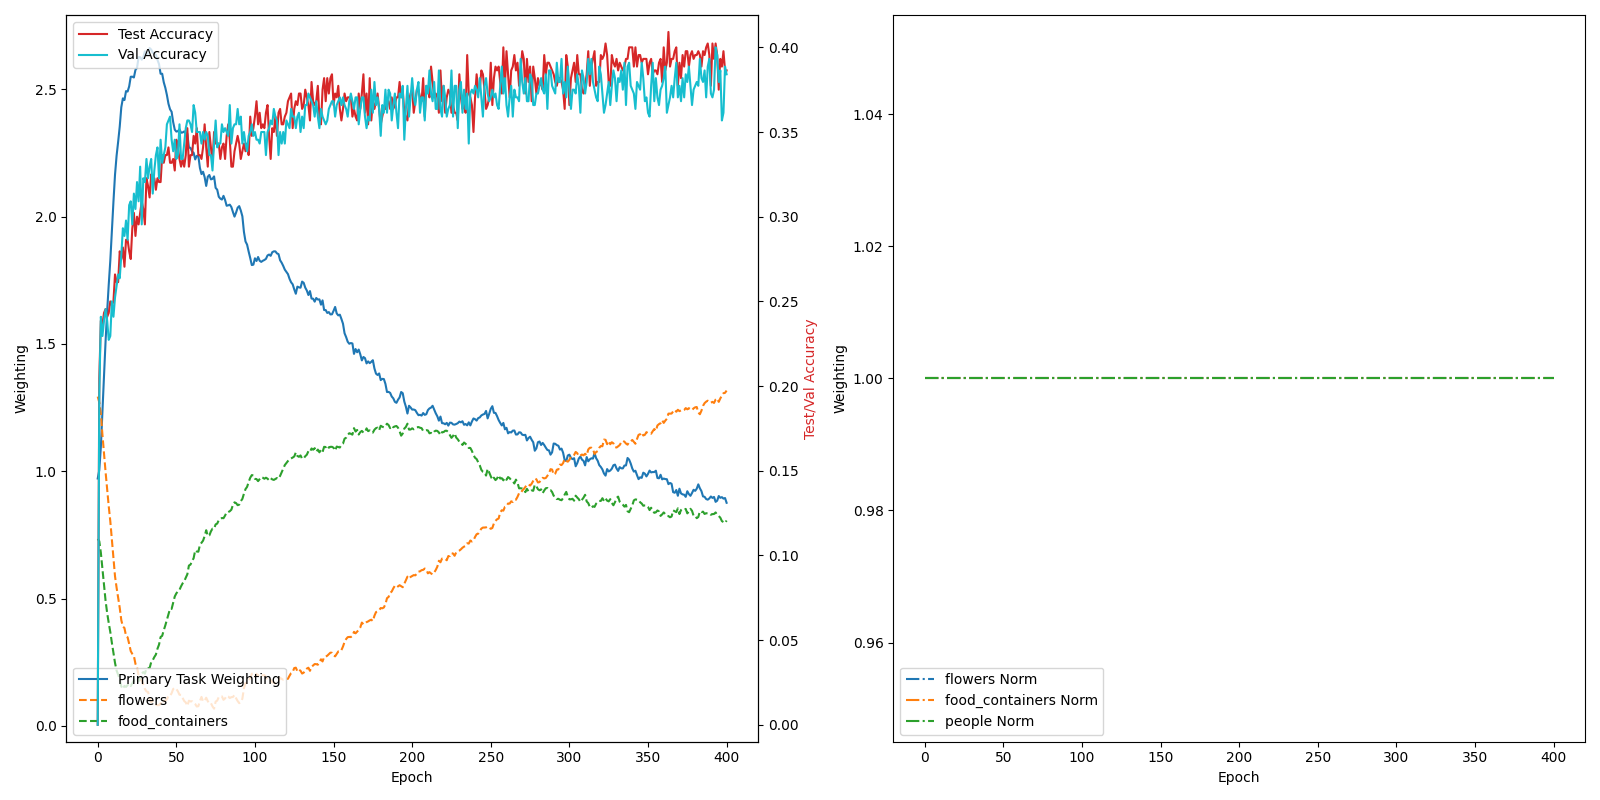

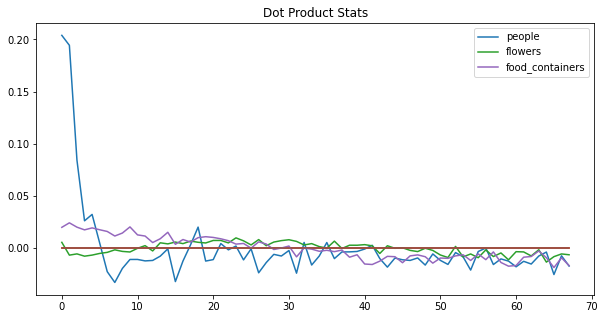

First 2/3 Stats :  [0.45378337 0.27178469 0.27443194]
Last 1/3 Stats :  [0.39435377 0.30966034 0.29598588]


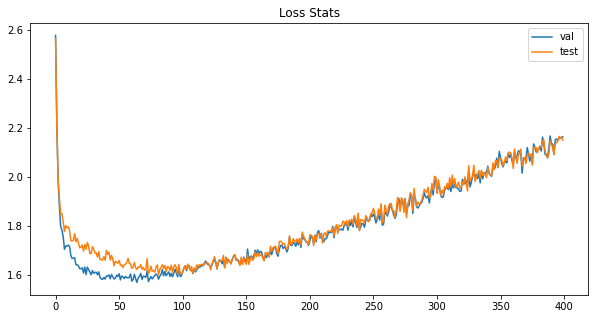

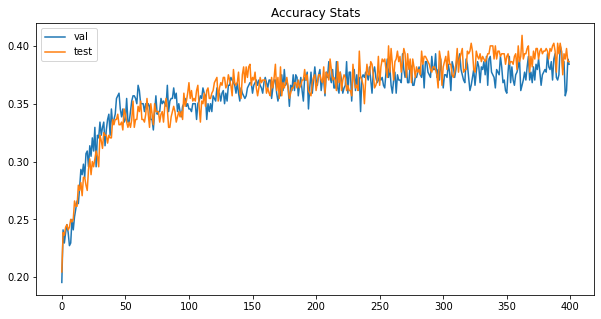



----------------------------------------------------------------------------------------------------------------------------------------------------------------
Folder Name :  m4m_cache/cosine_test.SGD/SGD.softmax.2.aux.nolrschedule.wlr_5e-2.sgdlr_1e-2.lr_1e-2.longer


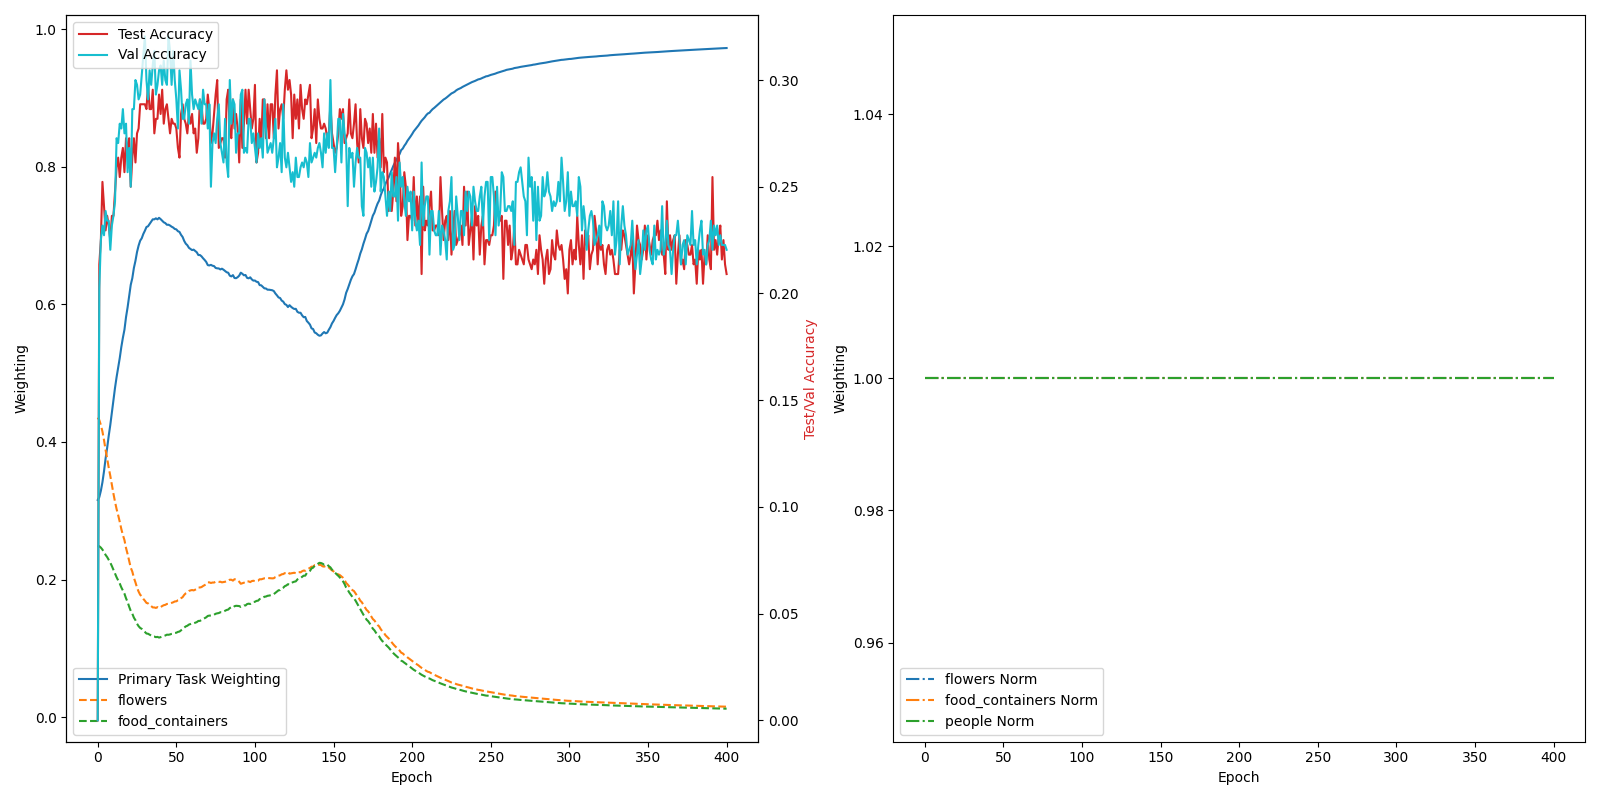

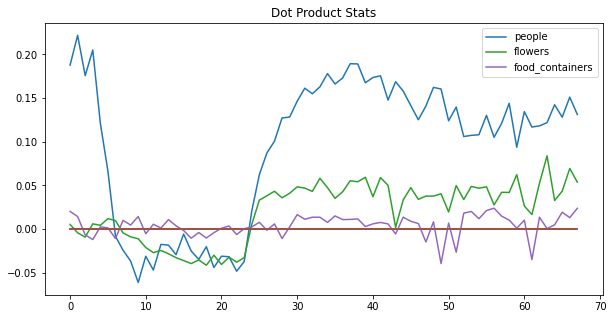

First 2/3 Stats :  [0.57842488 0.18001324 0.24156188]
Last 1/3 Stats :  [0.54874283 0.23820026 0.2130569 ]


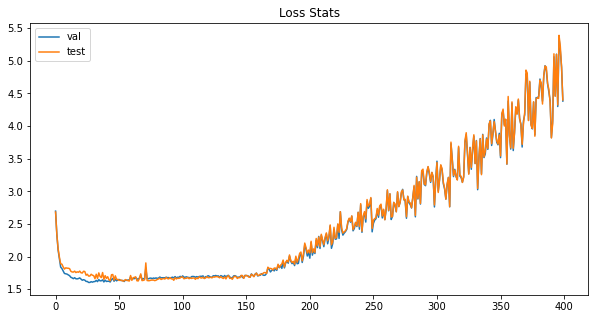

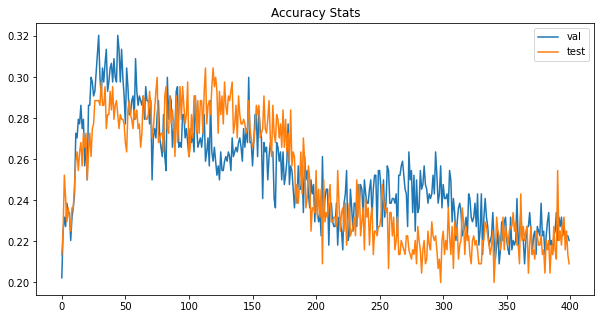



----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [28]:
fldrs = glob('m4m_cache/cosine_test.SGD/*.*1e-2*')
for fldr in fldrs:
    display_fldr(fldr, show_metrics=True)